In [1]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [2]:
# worning 무시
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 준비

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [5]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df["diabetes"].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [8]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## DNN 구조만들기 

## 중요 데이터 추출

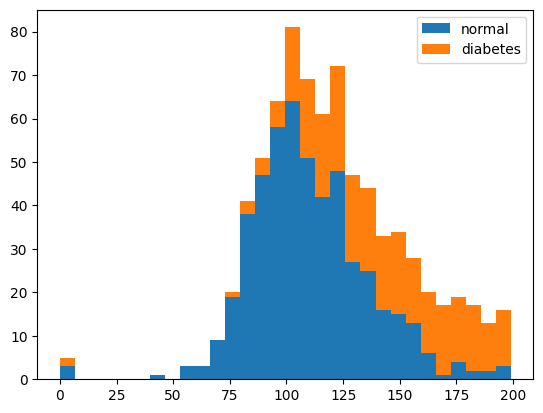

In [11]:
#공복 혈당 농도
plt.hist(x=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]], bins=30,
        histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

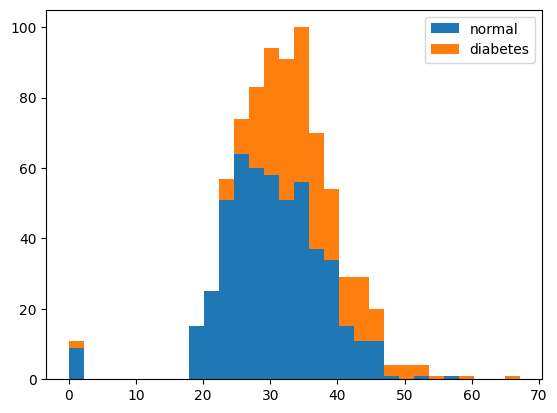

In [12]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

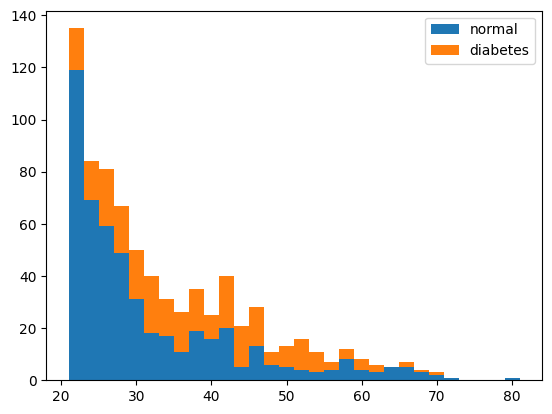

In [13]:
plt.hist(x=[df.age[df.diabetes==0], df.age[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

In [14]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:, 0:8] # 세부 정보를 X로 지정함
y = df.iloc[:, 8]   # 당뇨병 여부를 y로 지정함

In [17]:
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [20]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                  │ (None, 12)               │           108 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ Dense_2 (Dense)                  │ (None, 8)                │           104 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ Dense_3 (Dense)                  │ (None, 1)                │             9 │
└──────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

## DNN

In [ ]:
- 입력 FEATURE 9 : 컬럼 갯수, X
- 은닉층
    - layer :12
    - 2layer :8
    출력층1: 이진분류


In [32]:
model.add(Dense(12, activation='relu',name="Dense_1"))

In [33]:
model = Sequential()

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X, y, epochs= 100, batch_size=5, verbose='auto')

Epoch 1/100


ValueError: Sequential model sequential_2 cannot be built because it has no layers. Call `model.add(layer)`.

## 방향성 정의

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']

SyntaxError: incomplete input (136833798.py, line 1)

In [43]:
history = model.fit(X, y, epochs= 100, batch_size=5, verbose='auto')

Epoch 1/100


ValueError: Sequential model sequential_2 cannot be built because it has no layers. Call `model.add(layer)`.

In [46]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:, 0:8] # 세부 정보를 X로 지정함
y = df.iloc[:, 8]   # 당뇨병 여부를 y로 지정함

In [47]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                  │ (None, 12)               │           108 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ Dense_2 (Dense)                  │ (None, 8)                │           104 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ Dense_3 (Dense)                  │ (None, 1)                │             9 │
└──────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)